In [1]:
import matplotlib.pyplot as plt
import numpy as np

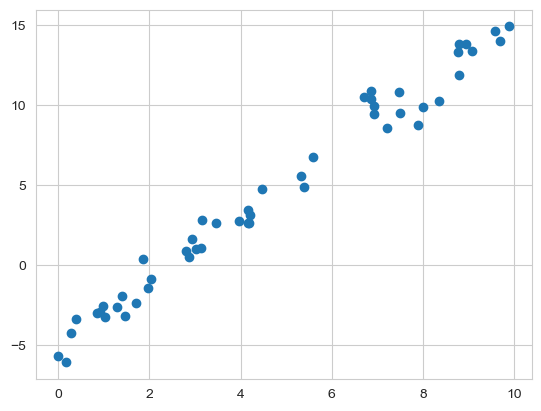

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

In [3]:
# fit a simple linear regression model.

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)

LinearRegression()

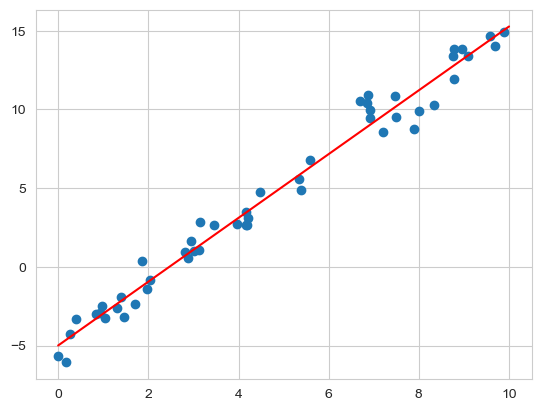

In [4]:
xfit = np.linspace(0, 10, 1000)

yfit = lr.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.show()

In [5]:
print(f'Slope: {lr.coef_[0]}')
print(f'Intercept: {lr.intercept_}')

Slope: 2.027208810360695
Intercept: -4.998577085553202


In [8]:
# Multi dimensional data

rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

lr.fit(X, y)
print(f'Slope: {lr.coef_}')
print(f'Intercept: {lr.intercept_}')

Slope: [ 1.5 -2.   1. ]
Intercept: 0.5000000000000173


### Polynomial Basis Function

In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

x = np.array([2, 3, 4])

poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

ValueError: x and y must have same first dimension, but have shapes (1000,) and (50,)

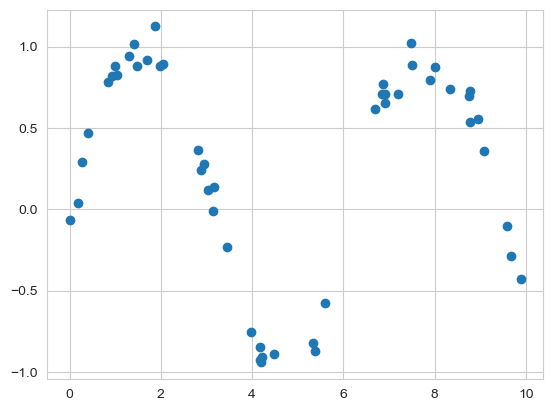

In [11]:
# make a pipeline..

from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=7, include_bias=False), LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)

yfit = poly_model.predict(x[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.show()

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin


class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""

    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

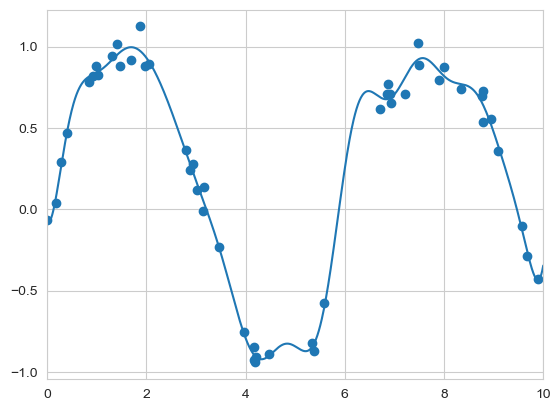

In [17]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);


## Regularization

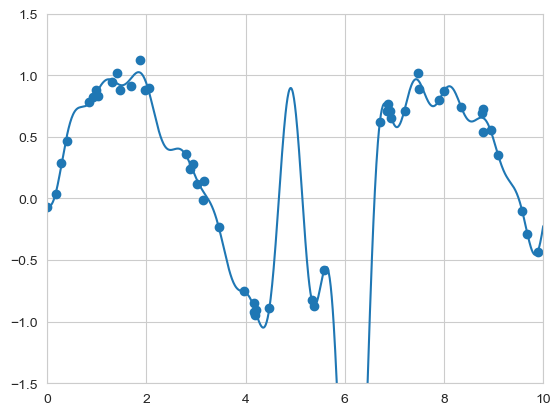

In [18]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())

model.fit(x[:, np.newaxis], y)

yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.show()

In [19]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    if title:
        ax[0].set_title(title)
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

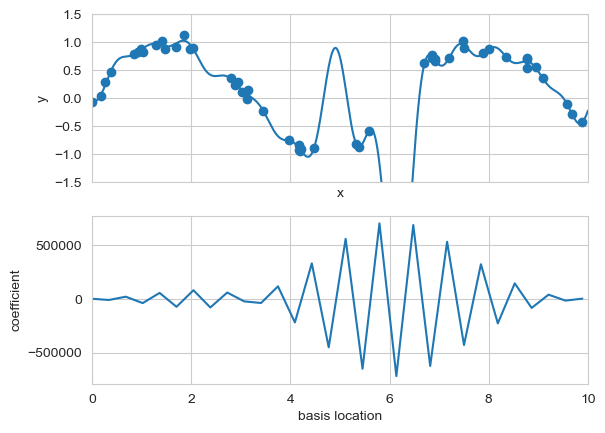

In [20]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

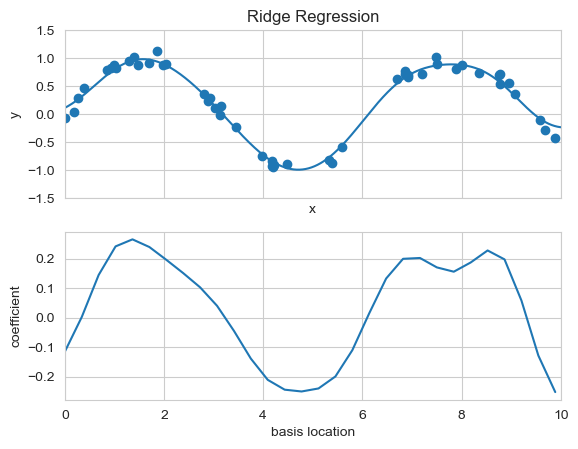

In [21]:
# Introduce L2 or ridge 
from sklearn.linear_model import Ridge

model = make_pipeline(GaussianFeatures(30), Ridge(alpha=1))
basis_plot(model, title='Ridge Regression')

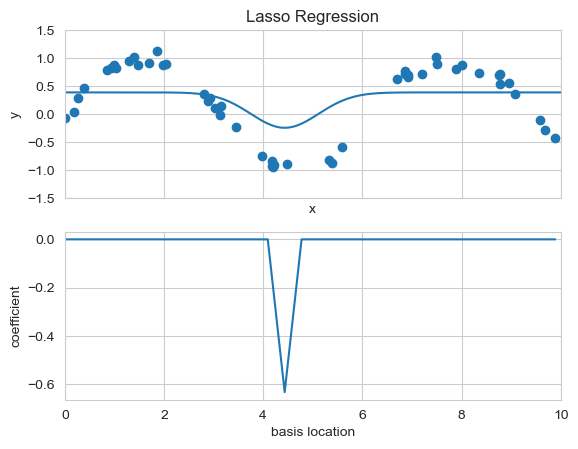

In [22]:
# L1 or lasso
from sklearn.linear_model import Lasso

model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.1))
basis_plot(model, title='Lasso Regression')